In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

Đọc file:


In [2]:
data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Cleanning data , encode data


In [6]:
data_encode = data.copy()

In [8]:
#Tìm các phần tử là duy nhất của các cột fuel_type, seller_type, transmission(là các cột cần mã hóa về dạng số)
lst_unique = []
lst_column_encoded = ["Extracurricular Activities"]
for i in lst_column_encoded:
    lst_unique.append(data_encode[i].unique().tolist())
lst_unique

[['Yes', 'No']]

In [10]:
#Tiến hành mã hóa các cột
data_encode["Extracurricular Activities"] = [0 if i == "No" else 1 for i in data_encode["Extracurricular Activities"]]
data_encode

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


**II.Đánh giá mức độ tương quan**

In [11]:
#Tính mức độ tương quan dữ liệu giữa các cột tron dữ liệu
cor_matrix = data_encode.corr()
cor_matrix

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


<Axes: >

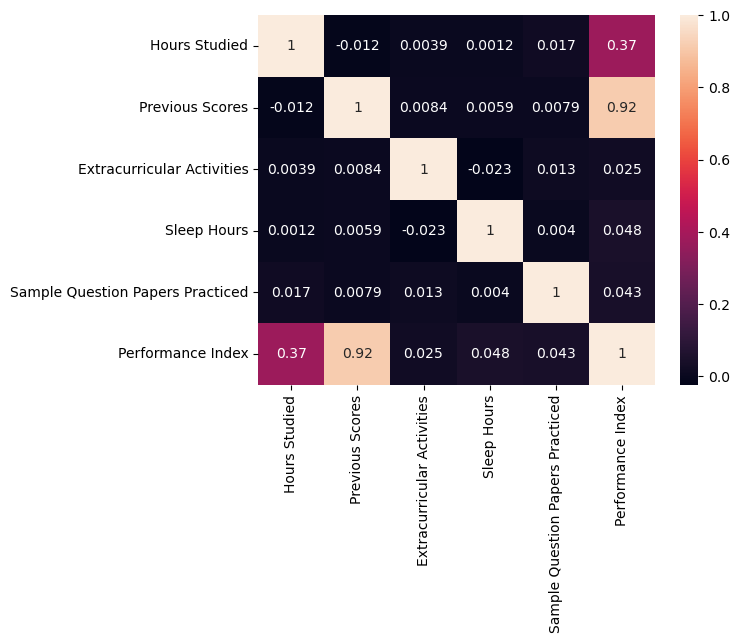

In [12]:
sns.heatmap(cor_matrix, annot = True)

Nhận xét:
+ Các cột present_price, fuel_type, seller_type, transmission, car_age có hệ số tương quan tương đối cao với cột selling_price
+ Các cột kms_price, number_of_owner có hệ số tương quan thấp, cần phải loại bỏ